In [ ]:
## analyze time usage google sheet

In [1]:
import sys
print(sys.version)
print(sys.executable)
%matplotlib inline

3.5.4 |Anaconda, Inc.| (default, Oct  5 2017, 02:58:14) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
/Users/cswitzer/anaconda/envs/p35/bin/python


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
test = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   '1OPPbkBkkBJf5_TRd_TWioTfNZtfDlUlQiDoCfRpzdoI' +
                   '/export?gid=0&format=csv'
                  )
test.head(5)  #

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,NaN,07:15,commute,n,NaN
2,NaN,07:30,exercise,n,NaN
3,NaN,08:15,maintenance,n,Trying to get title for my car
4,NaN,09:26,eScience,y,prep lightning talk


In [4]:
# %qtconsole

In [5]:
def cellFillBelow(dataframe, column):
    #loop through cells
    tmp = dataframe[column].copy()
    
    currInfo = tmp[0]
    for ii in range(len(tmp)):
        if pd.isnull(tmp[ii]):
            tmp[ii] = currInfo
        else:
            currInfo = tmp[ii]
    
    return(tmp)

In [6]:
test['day'] = cellFillBelow(test, 'day')

In [7]:
test.head()

,day,hour,category,productive,notes
0,2 Oct 2017,06:00,get ready,n,NaN
1,2 Oct 2017,07:15,commute,n,NaN
2,2 Oct 2017,07:30,exercise,n,NaN
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car
4,2 Oct 2017,09:26,eScience,y,prep lightning talk


In [8]:
test.tail()

,day,hour,category,productive,notes
362,29 Nov 2017,08:00,coffee,NaN,NaN
363,29 Nov 2017,08:30,kalmia paper - post acceptance,NaN,NaN
364,29 Nov 2017,12:00,lunch,NaN,NaN
365,29 Nov 2017,12:30,prep for lab meeting,NaN,NaN
366,29 Nov 2017,17:00,end,NaN,NaN


In [9]:
from datetime import datetime

In [10]:
times2 = [datetime.strptime(ii, "%H:%M") for ii in test['hour']]



datetime.strftime(times2[0],"%H:%M" )

'06:00'

In [11]:
timeDiffs = np.diff(times2)

In [12]:
def decimalHours(timedelta):
    duration =timedelta
    seconds = duration.total_seconds()
    hours = seconds / 3600
    return(hours)

timeDiffsHours = [decimalHours(jj) for jj in timeDiffs]
timeDiffsHours.append(0) # add a zero at the end of the dataset
test["timeSpent"] = timeDiffsHours
test.head()

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333


In [13]:
# remove last entry for each day
def removeLastOfDay(dataframe, daycolumn):
    #loop through cells
    tmp = dataframe[daycolumn].copy()
    
    dropRows = []
    for ii in range(len(tmp)):
        try:
            if tmp[ii] != tmp[ii + 1]:
                dropRows.append(ii)
        except:
             dropRows.append(ii)
    
    return(dropRows)

In [14]:
rowRemove = removeLastOfDay(test, "day")

In [15]:
timeCalcs = test.drop(rowRemove)

In [16]:
timeCalcs

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333
5,2 Oct 2017,09:37,maintenance,n,trying to get health insurance cards from UW,0.266667
6,2 Oct 2017,09:53,transition,n,NaN,0.066667
7,2 Oct 2017,09:57,kalmia paper,y,response to reviewers,0.766667
8,2 Oct 2017,10:43,snack,n,NaN,0.200000
9,2 Oct 2017,10:55,kalmia paper,y,NaN,0.200000


In [17]:
timeCalcs

,day,hour,category,productive,notes,timeSpent
0,2 Oct 2017,06:00,get ready,n,NaN,1.250000
1,2 Oct 2017,07:15,commute,n,NaN,0.250000
2,2 Oct 2017,07:30,exercise,n,NaN,0.750000
3,2 Oct 2017,08:15,maintenance,n,Trying to get title for my car,1.183333
4,2 Oct 2017,09:26,eScience,y,prep lightning talk,0.183333
5,2 Oct 2017,09:37,maintenance,n,trying to get health insurance cards from UW,0.266667
6,2 Oct 2017,09:53,transition,n,NaN,0.066667
7,2 Oct 2017,09:57,kalmia paper,y,response to reviewers,0.766667
8,2 Oct 2017,10:43,snack,n,NaN,0.200000
9,2 Oct 2017,10:55,kalmia paper,y,NaN,0.200000


In [18]:
g = timeCalcs.groupby('category')['timeSpent'].sum().reset_index(name='sum')

In [19]:
g2 = pd.DataFrame(g).sort_values("sum", ascending=False)
g2.index = range(len(g2))
g2.head()

,category,sum
0,kalmia paper,36.216667
1,kalmia paper - post acceptance,28.833333
2,seminar,26.083333
3,Moore/Sloan Summit,23.000000
4,pythonProgram,22.300000


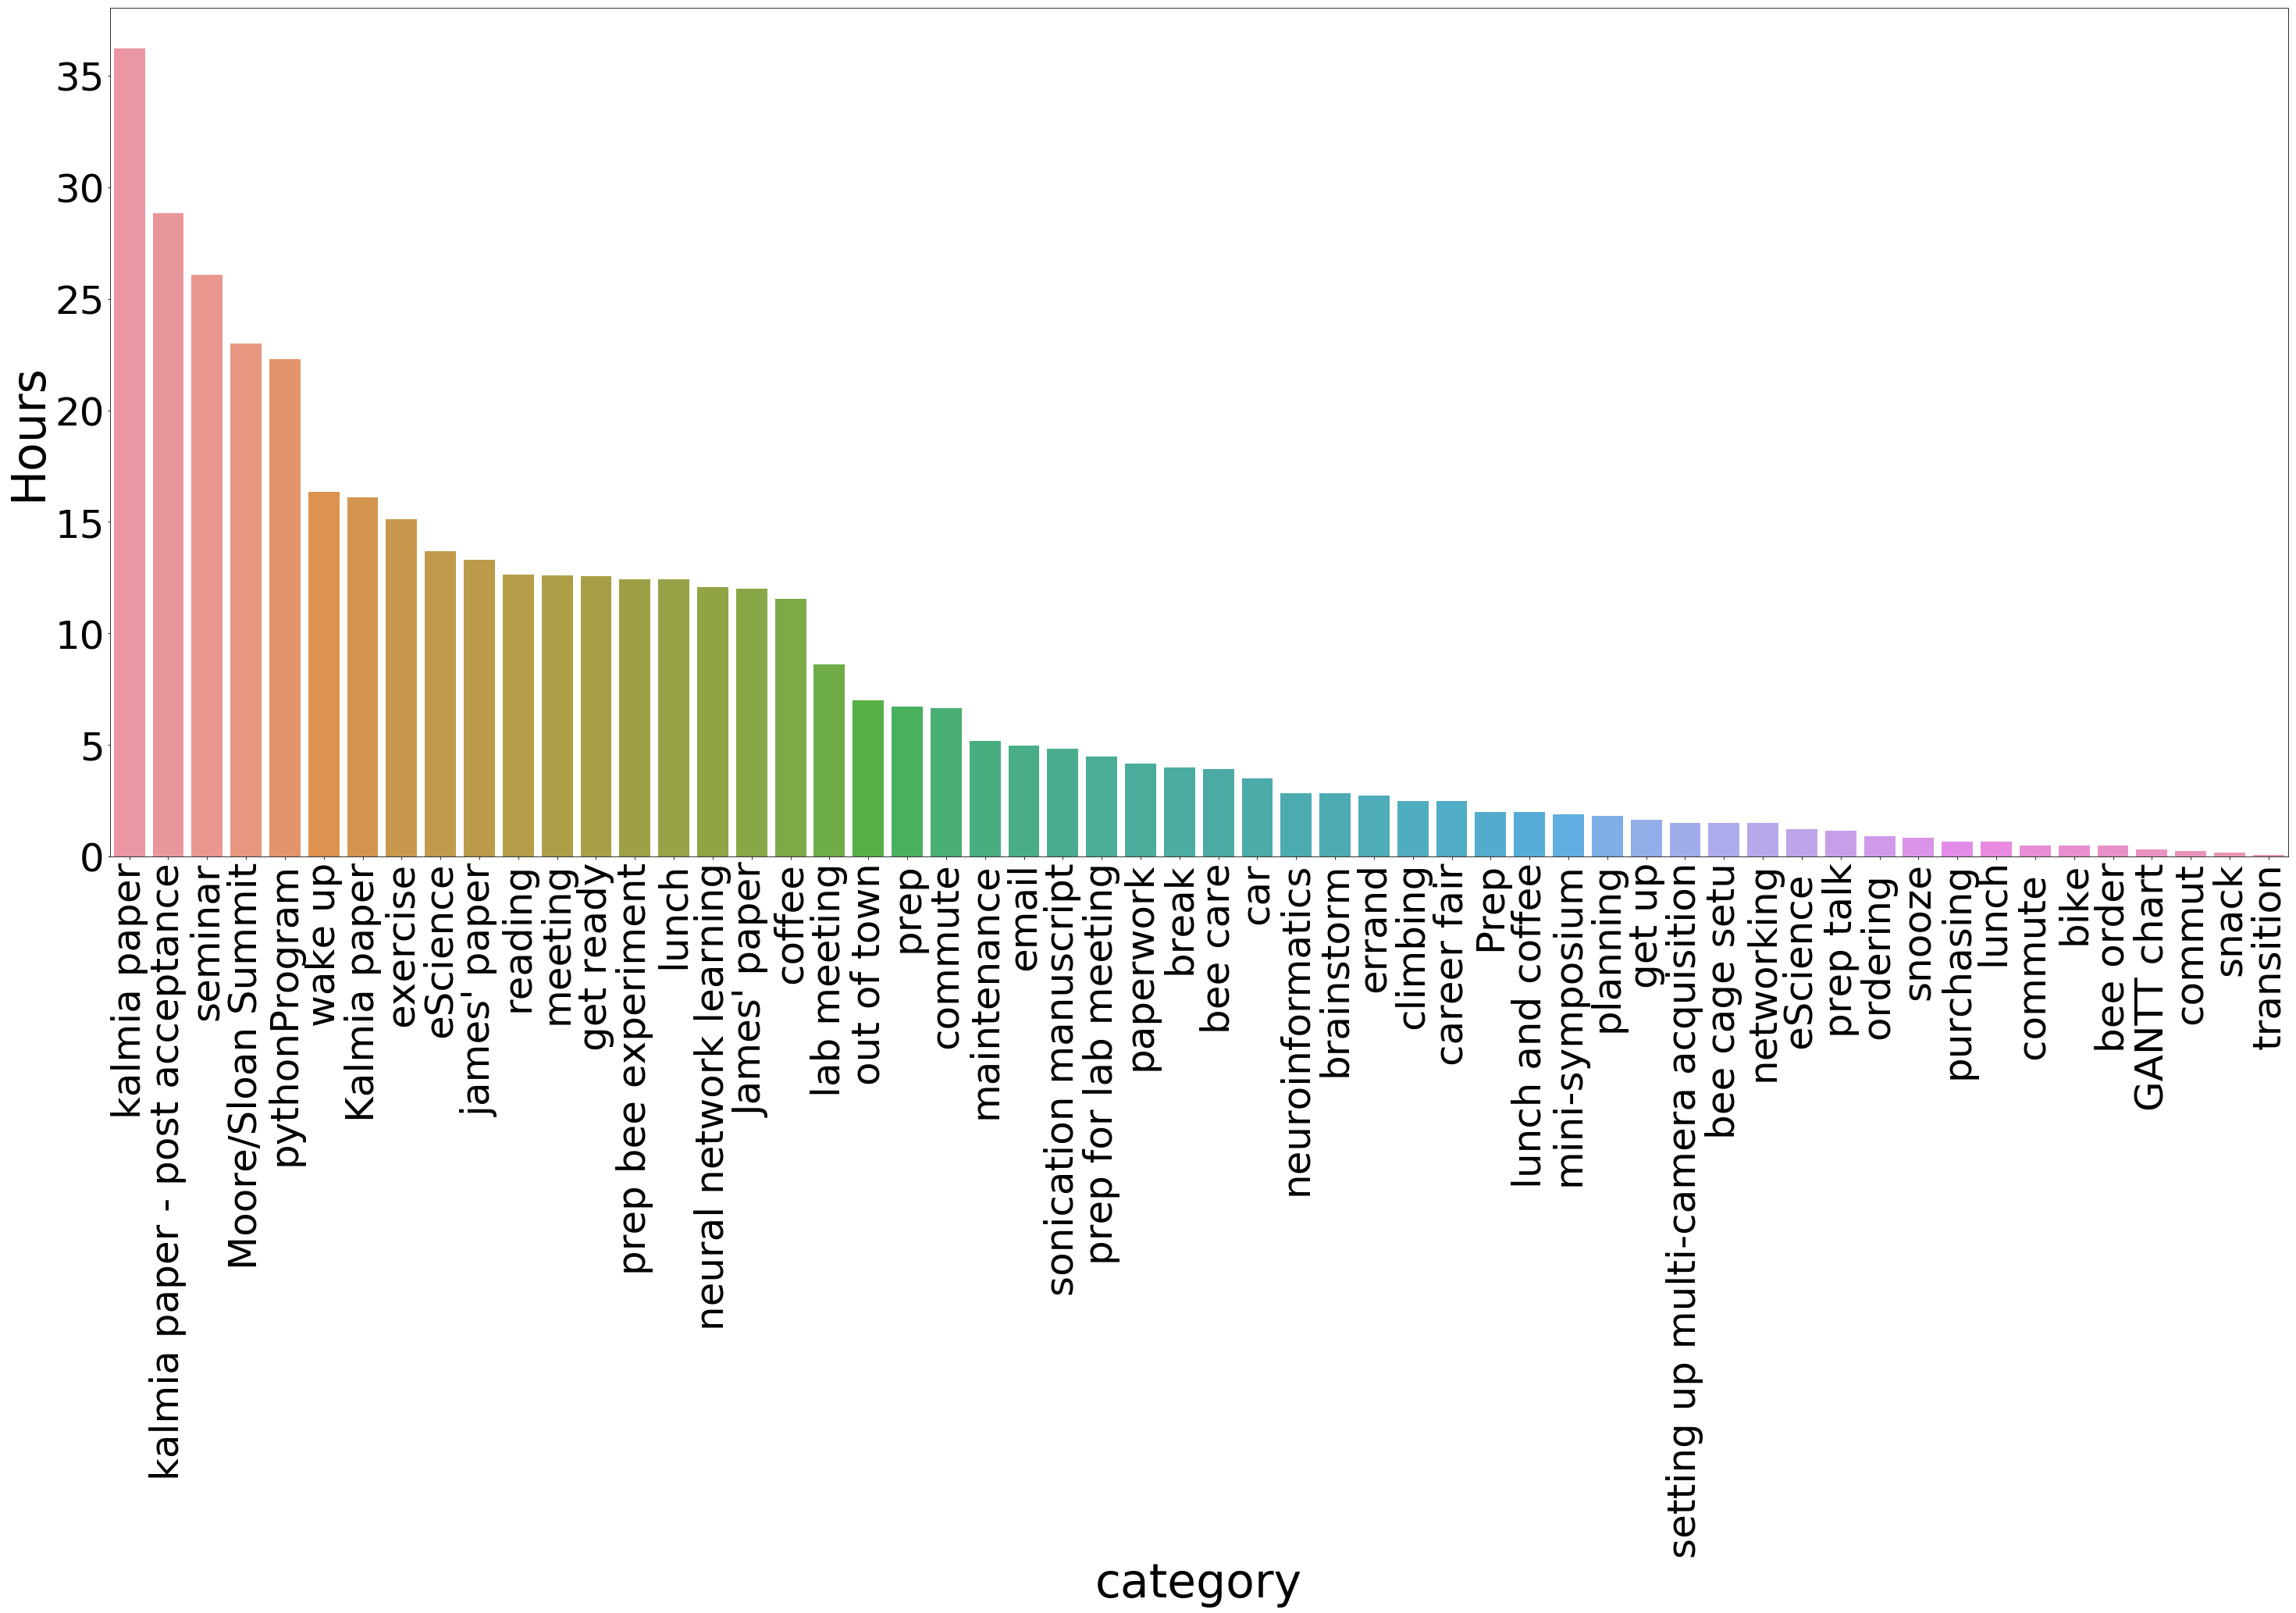

In [20]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g2.category, np.array(g2["sum"]))
plt.xticks(rotation="vertical")
plt.show()

In [21]:
np.array(g["sum"])

array([  0.66666667,   0.33333333,  12.01666667,  16.11666667,
        23.        ,   2.        ,   1.5       ,   3.91666667,
         0.5       ,   0.5       ,   2.83333333,   4.        ,
         3.5       ,   2.5       ,   2.5       ,  11.55      ,
         0.25      ,   6.66666667,   0.5       ,  13.68333333,
         1.25      ,   4.98333333,   2.75      ,  15.13333333,
        12.58333333,   1.66666667,  13.3       ,  36.21666667,
        28.83333333,   8.6       ,  12.41666667,   2.        ,
         5.18333333,  12.61666667,   1.91666667,   1.5       ,
        12.08333333,   2.83333333,   0.91666667,   7.        ,
         4.16666667,   1.83333333,   6.71666667,  12.41666667,
         4.5       ,   1.16666667,   0.66666667,  22.3       ,
        12.65      ,  26.08333333,   1.5       ,   0.2       ,
         0.83333333,   4.83333333,   0.06666667,  16.33333333])

In [22]:
len(np.unique(timeCalcs.day))

39

In [23]:
g2["sum"].sum()

408.5833333333334

In [24]:
g2

,category,sum
0,kalmia paper,36.216667
1,kalmia paper - post acceptance,28.833333
2,seminar,26.083333
3,Moore/Sloan Summit,23.000000
4,pythonProgram,22.300000
5,wake up,16.333333
6,Kalmia paper,16.116667
7,exercise,15.133333
8,eScience,13.683333
9,james' paper,13.300000


In [26]:
nonWorkActivities = ["bike", "snooze", "exercise", "commute", "climbing", "comute", "wake up", "get ready"]

rowRemove = [g2.category[ii] not in nonWorkActivities for ii in range(len(g2))]


In [27]:
g3 = g2[rowRemove]

In [28]:
g3["sum"].sum()/len(np.unique(timeCalcs.day))

9.07777777777778

In [29]:
len(timeCalcs)

328

In [31]:
# calculate hours for each day
rowRemove = [timeCalcs.category[ii] not in nonWorkActivities for ii in timeCalcs.index]

timecalcs2 =  timeCalcs[rowRemove]

dailyHours= timecalcs2.groupby("day")['timeSpent'].sum().reset_index(name='sum')
dailyHours.sort_values("sum")

,day,sum
18,21 Nov 2017,5.500000
16,20 Nov 2017,6.000000
37,9 Nov 2017,7.000000
22,25 Oct 2017,8.166667
5,13 Oct 2017,8.250000
19,22 Nov 2017,8.250000
3,12 Oct 2017,8.250000
17,20 Oct 2017,8.350000
14,2 Nov 2017,8.416667
34,6 Oct 2017,8.500000


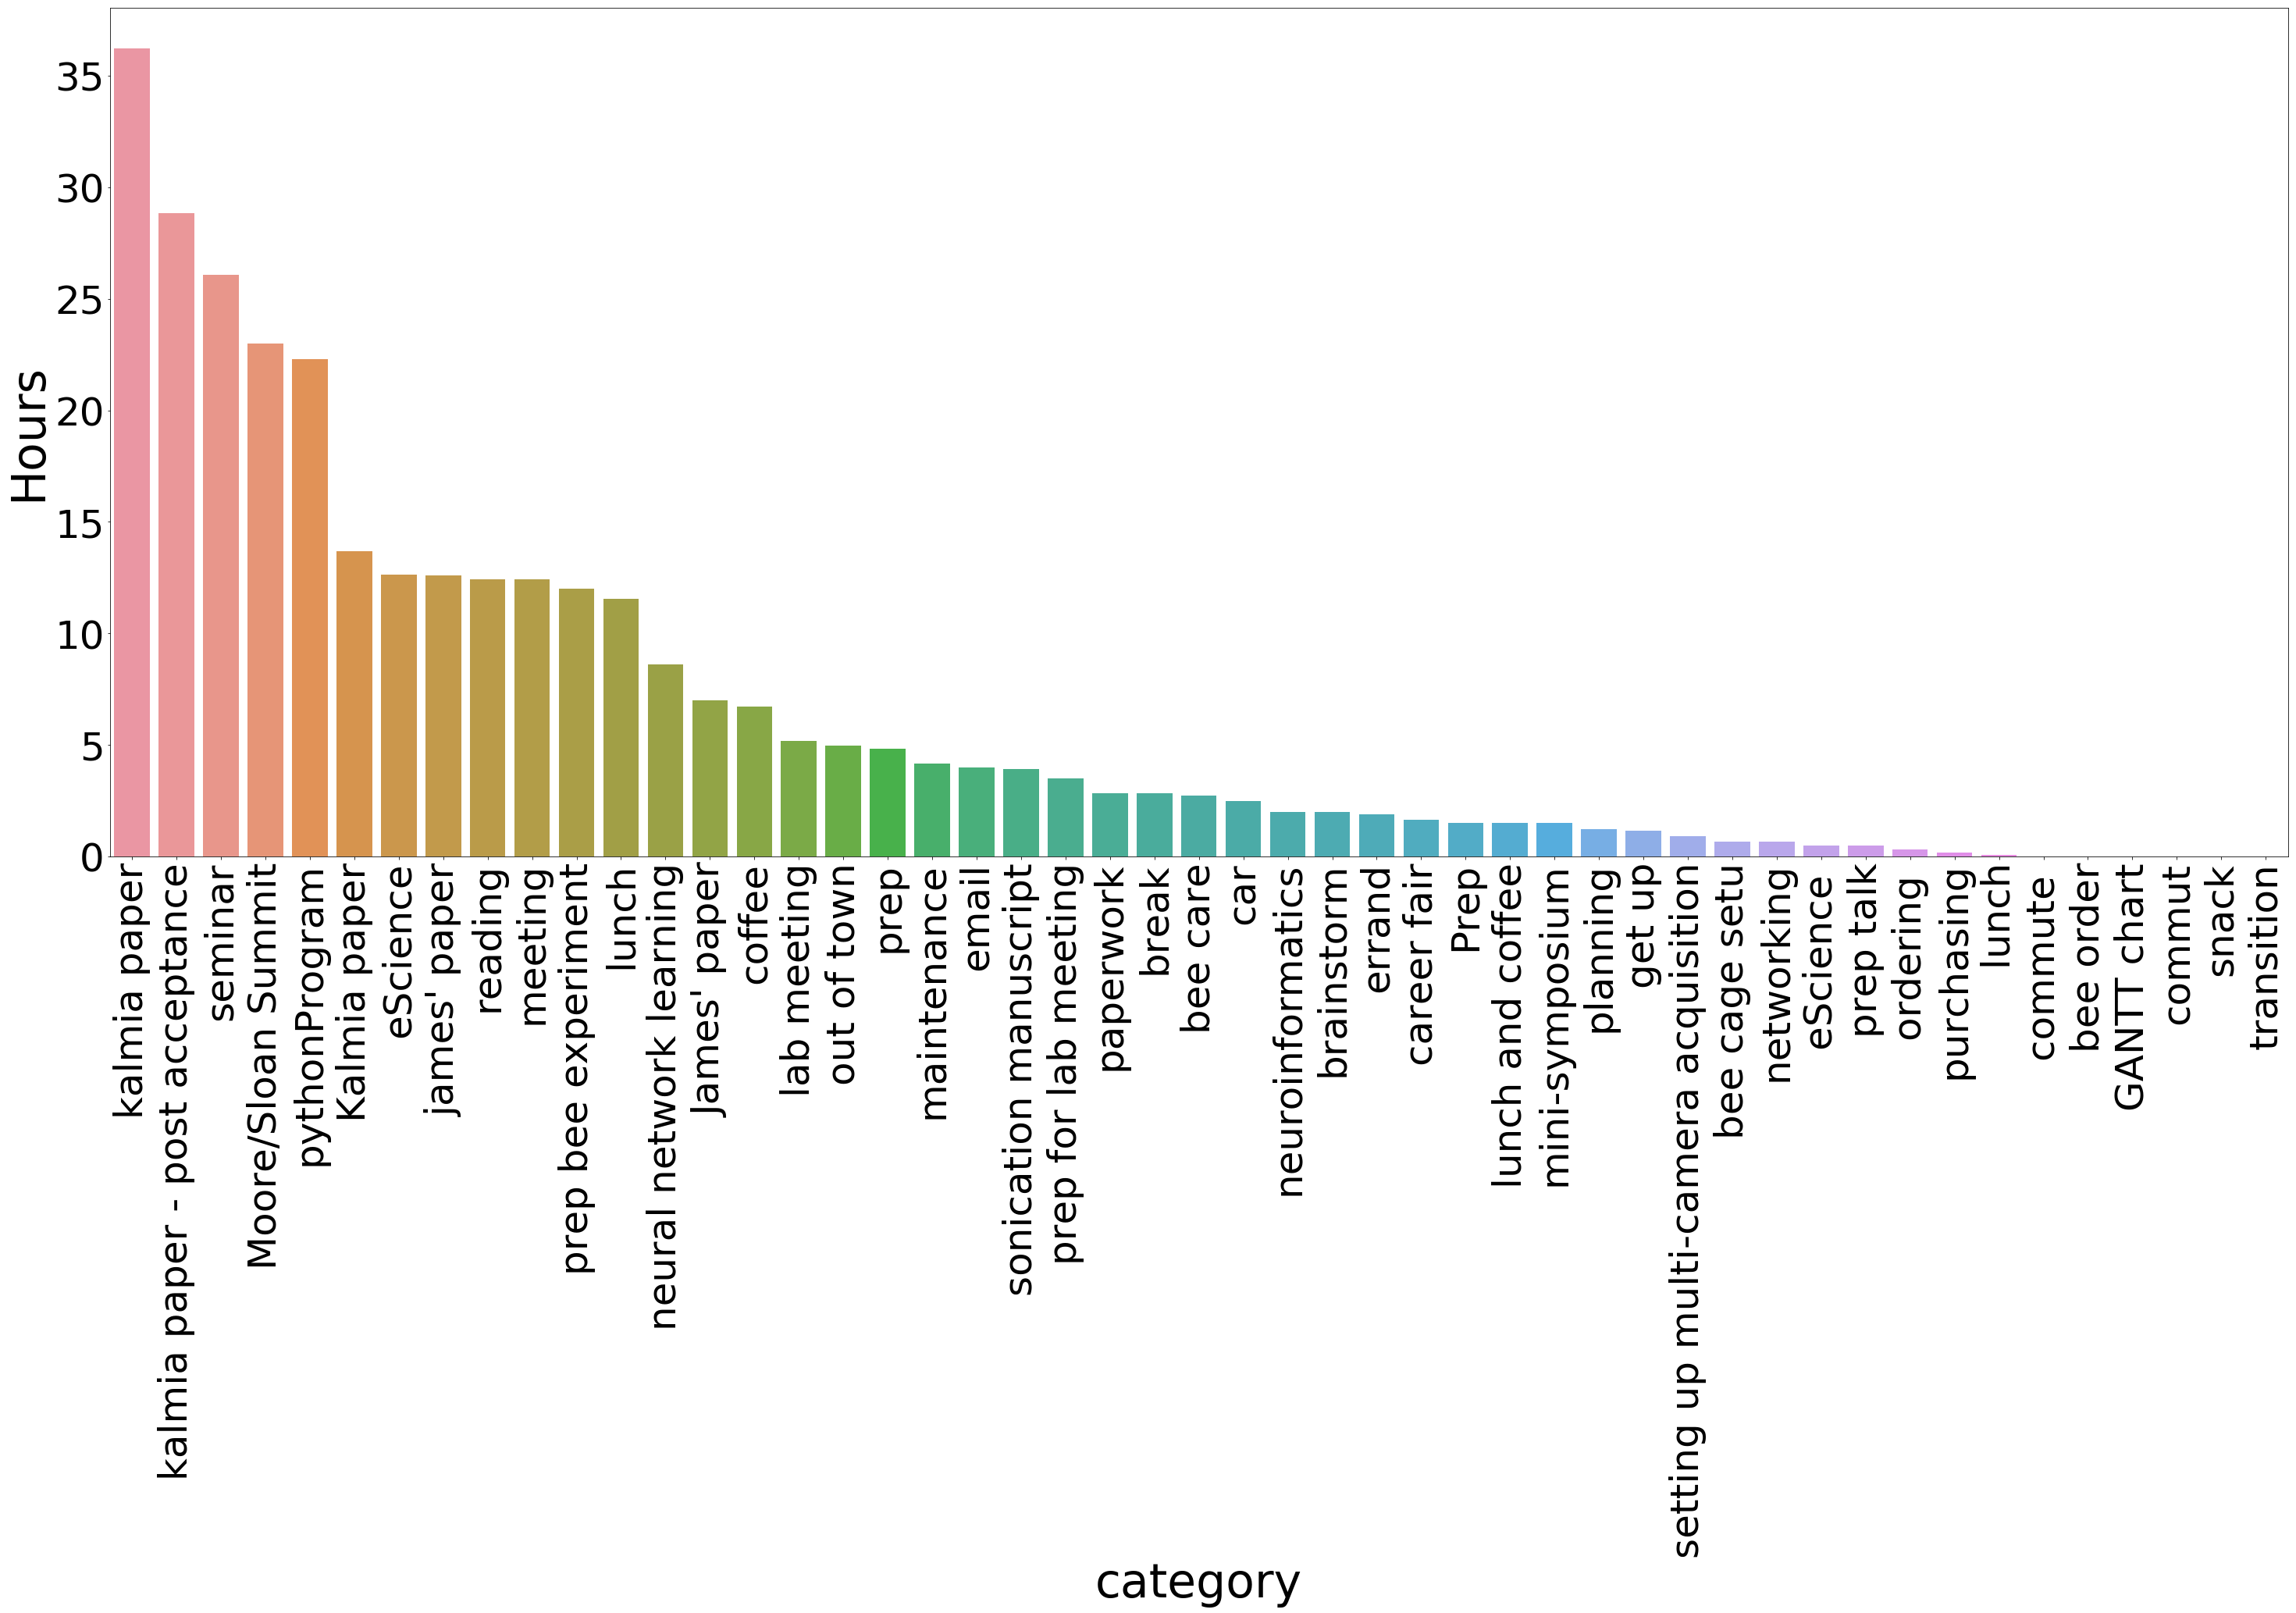

In [33]:
plt.figure(figsize=(50, 20))
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xlabel('Activity', fontsize = 60)
plt.ylabel('Hours', fontsize = 60)
sns.barplot(g3.category, np.array(g3["sum"]))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
g3